In [18]:
#buffer = ds.current_task_buffer
with open('datasets/flickr_buffer/flickr_task_buffer_train_0.pkl','rb') as f:
    buffer = pickle.load(f)

In [23]:
print(buffer[0])

{'tokens': ['a', 'motorcyclist', '"', 'pops', 'a', 'wheelie', '"', 'in', 'a', 'grassy', 'field', 'framed', 'by', 'rolling', 'hills', '.'], 'task_id': 518, 'image_id': '3353962769', 'instance_id': 8714, 'phrase_offset': (0, 2)}


{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 529, 18, 19, 17, 533, 22, 21, 25, 26, 537, 28, 29, 542, 539, 32, 30, 34, 35, 36, 37, 38, 39, 40, 33, 42, 43, 44, 45, 41, 47, 48, 49, 562, 51, 52, 53, 566, 54, 55, 56, 58, 571, 60, 61, 62, 63, 59, 65, 66, 67, 68, 69, 70, 71, 72, 64, 75, 76, 77, 78, 79, 80, 81, 83, 84, 86, 88, 602, 92, 93, 94, 95, 608, 96, 100, 101, 103, 617, 106, 107, 108, 105, 110, 111, 112, 625, 113, 116, 118, 119, 121, 122, 641, 133, 134, 136, 137, 139, 140, 654, 143, 142, 145, 149, 667, 31, 156, 158, 160, 162, 163, 164, 166, 167, 168, 681, 169, 173, 689, 544, 179, 180, 181, 694, 188, 190, 191, 192, 705, 194, 707, 196, 197, 199, 200, 201, 203, 715, 204, 205, 209, 212, 213, 214, 217, 225, 228, 231, 745, 240, 761, 251, 257, 260, 774, 266, 267, 268, 274, 790, 279, 278, 283, 287, 293, 295, 299, 311, 314, 827, 316, 315, 318, 324, 837, 838, 329, 336, 337, 848, 342, 346, 347, 354, 359, 874, 374, 887, 379, 900, 388, 390, 391, 400, 403, 409, 410, 925, 932, 445, 446, 4

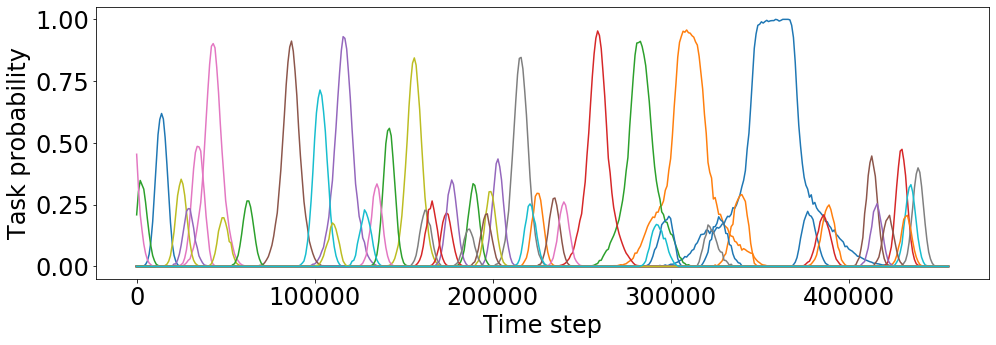

In [19]:
from collections import defaultdict
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
matplotlib.rcParams.update({'font.size': 24})
K = 1000
l = buffer
s = set()
plt.figure(figsize=(16,5))
data = np.zeros((K, (len(l) + 1) // K + 1))
for i in range(0, len(l) - K, K):
    cnt = defaultdict(int)
    for j in range(i, i + K):
        #print(l[j])
        if 'task_id' in l[j]:
            cnt[l[j]['task_id']] += 1
    #print(cnt)
    for k in cnt:
        data[k, i // K] = cnt[k] / K
    if 'task_id' in l[j]: s.add(l[j]['task_id'])
for i in range(K):
    #print(data[i])
    if i == 50: break
    plt.plot(np.arange(0, data.shape[1] * K, K), data[i])

plt.ylabel('Task probability')
plt.xlabel('Time step')
plt.savefig('datasets/flickr_stream_viz.pdf', bbox_inches='tight')
print(s, len(s))